In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns


from pm4py.objects.conversion.log import converter as log_converter
from pm4py.objects.log.importer.xes import importer as xes_importer
from pm4py.objects.log.util import dataframe_utils


from pm4py.algo.discovery.alpha import algorithm as alpha_miner
from pm4py.algo.discovery.inductive import algorithm as inductive_miner
from pm4py.algo.discovery.heuristics import algorithm as heuristics_miner
from pm4py.algo.discovery.dfg import algorithm as dfg_discovery


from pm4py.visualization.petri_net import visualizer as pn_visualizer
from pm4py.visualization.process_tree import visualizer as pt_visualizer
from pm4py.visualization.heuristics_net import visualizer as hn_visualizer
from pm4py.visualization.dfg import visualizer as dfg_visualization
import graphviz

from pm4py.objects.conversion.process_tree import converter as pt_converter

In [2]:
conda install seaborn

Solving environment: \ | / - \ | / - \ | / - \ | / - \ | / - \ | / - \ | / - \ | / - \ | / - \ | done


==> WARNING: A newer version of conda exists. <==
  current version: 4.10.3
  latest version: 4.11.0

Please update conda by running

    $ conda update -n base -c defaults conda



## Package Plan ##

  environment location: /opt/anaconda3/envs/minimal

  added / updated specs:
    - seaborn


The following packages will be downloaded:

    package                    |            build
    ---------------------------|-----------------
    brotli-1.0.9               |       h7f98852_6          18 KB  conda-forge
    brotli-bin-1.0.9           |       h7f98852_6          19 KB  conda-forge
    certifi-2021.10.8          |   py38h578d9bd_1         145 KB  conda-forge
    cycler-0.11.0              |     pyhd8ed1ab_0          10 KB  conda-forge
    fonttools-4.29.1           |   py38h497a2fe_0         1.6 MB  co

In [4]:
it_train = pd.read_csv("BPI_Challenge_2-training.csv")
it_test = pd.read_csv("BPI_Challenge_2-test.csv")

In [6]:
it_train.head()

,eventID,case concept:name,case REG_DATE,case AMOUNT_REQ,event concept:name,event lifecycle:transition,event time:timestamp
0,0,173688,2011-10-01T00:38:44.546+02:00,20000,A_SUBMITTED,COMPLETE,01-10-2011 00:38:44.546
1,1,173688,2011-10-01T00:38:44.546+02:00,20000,A_PARTLYSUBMITTED,COMPLETE,01-10-2011 00:38:44.880
2,2,173688,2011-10-01T00:38:44.546+02:00,20000,A_PREACCEPTED,COMPLETE,01-10-2011 00:39:37.906
3,3,173688,2011-10-01T00:38:44.546+02:00,20000,W_Completeren aanvraag,SCHEDULE,01-10-2011 00:39:38.875
4,4294967296,173691,2011-10-01T08:08:58.256+02:00,5000,A_SUBMITTED,COMPLETE,01-10-2011 08:08:58.256


In [7]:
it_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 214377 entries, 0 to 214376
Data columns (total 7 columns):
 #   Column                      Non-Null Count   Dtype 
---  ------                      --------------   ----- 
 0   eventID                     214377 non-null  int64 
 1   case concept:name           214377 non-null  int64 
 2   case REG_DATE               214377 non-null  object
 3   case AMOUNT_REQ             214377 non-null  int64 
 4   event concept:name          214377 non-null  object
 5   event lifecycle:transition  214377 non-null  object
 6   event time:timestamp        214377 non-null  object
dtypes: int64(3), object(4)
memory usage: 11.4+ MB


In [8]:
it_train.describe(include='all')

,eventID,case concept:name,case REG_DATE,case AMOUNT_REQ,event concept:name,event lifecycle:transition,event time:timestamp
count,2.143770e+05,214377.000000,214377,214377.000000,214377,214377,214377
unique,NaN,NaN,10469,NaN,24,3,202799
top,NaN,NaN,2011-11-15T13:42:45.592+01:00,NaN,W_Nabellen offertes,COMPLETE,17-01-2012 10:35:16.292
freq,NaN,NaN,175,NaN,43880,134347,4
mean,2.268239e+13,190155.106742,NaN,15349.297327,NaN,NaN,NaN
std,1.324009e+13,9592.111876,NaN,12179.774398,NaN,NaN,NaN
min,0.000000e+00,173688.000000,NaN,0.000000,NaN,NaN,NaN
25%,1.090922e+13,181658.000000,NaN,6500.000000,NaN,NaN,NaN
50%,2.328302e+13,190591.000000,NaN,10300.000000,NaN,NaN,NaN
75%,3.404191e+13,198373.000000,NaN,20000.000000,NaN,NaN,NaN


In [14]:
duplicate_rows_df = it_train[it_train.duplicated()]
print("number of duplicate rows: ", duplicate_rows_df.shape)

number of duplicate rows:  (0, 7)


In [15]:
print(it_train.isnull().sum())

eventID                       0
case:concept:name             0
case REG_DATE                 0
case AMOUNT_REQ               0
concept:name                  0
event lifecycle:transition    0
event time:timestamp          0
dtype: int64


In [16]:
it_train.rename(columns={'case concept:name': 'case:concept:name', 'event concept:name': 'concept:name'}, inplace=True)

In [17]:

df = dataframe_utils.convert_timestamp_columns_in_df(it_train)
df = df.sort_values('event time:timestamp')

log = log_converter.apply(df)

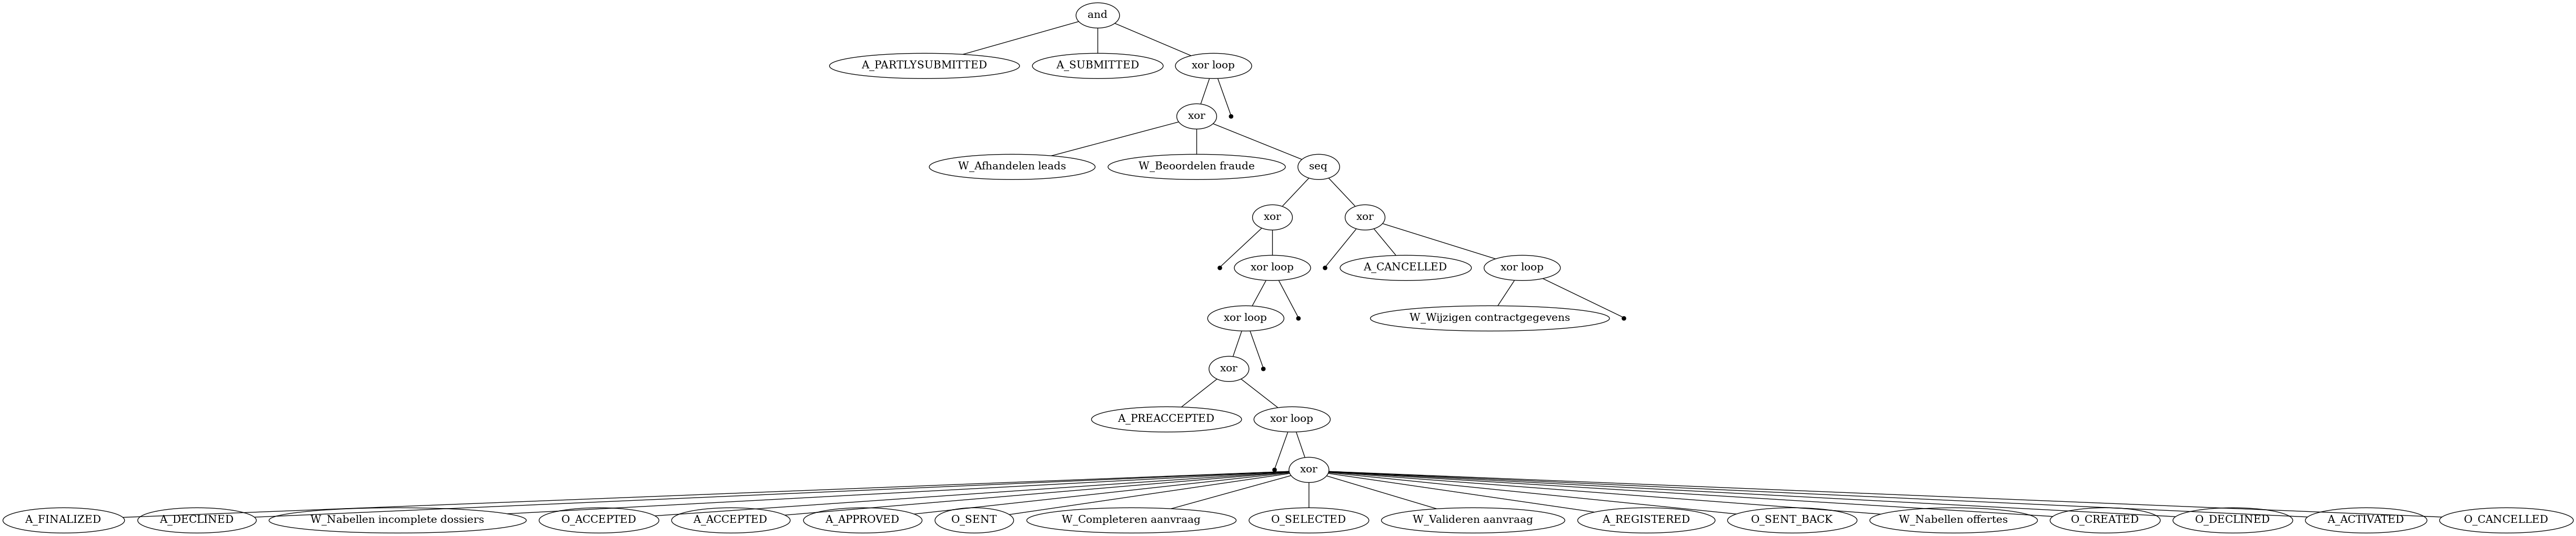

In [18]:
# create the process tree
tree = inductive_miner.apply_tree(log)

# viz
gviz = pt_visualizer.apply(tree)
pt_visualizer.view(gviz)

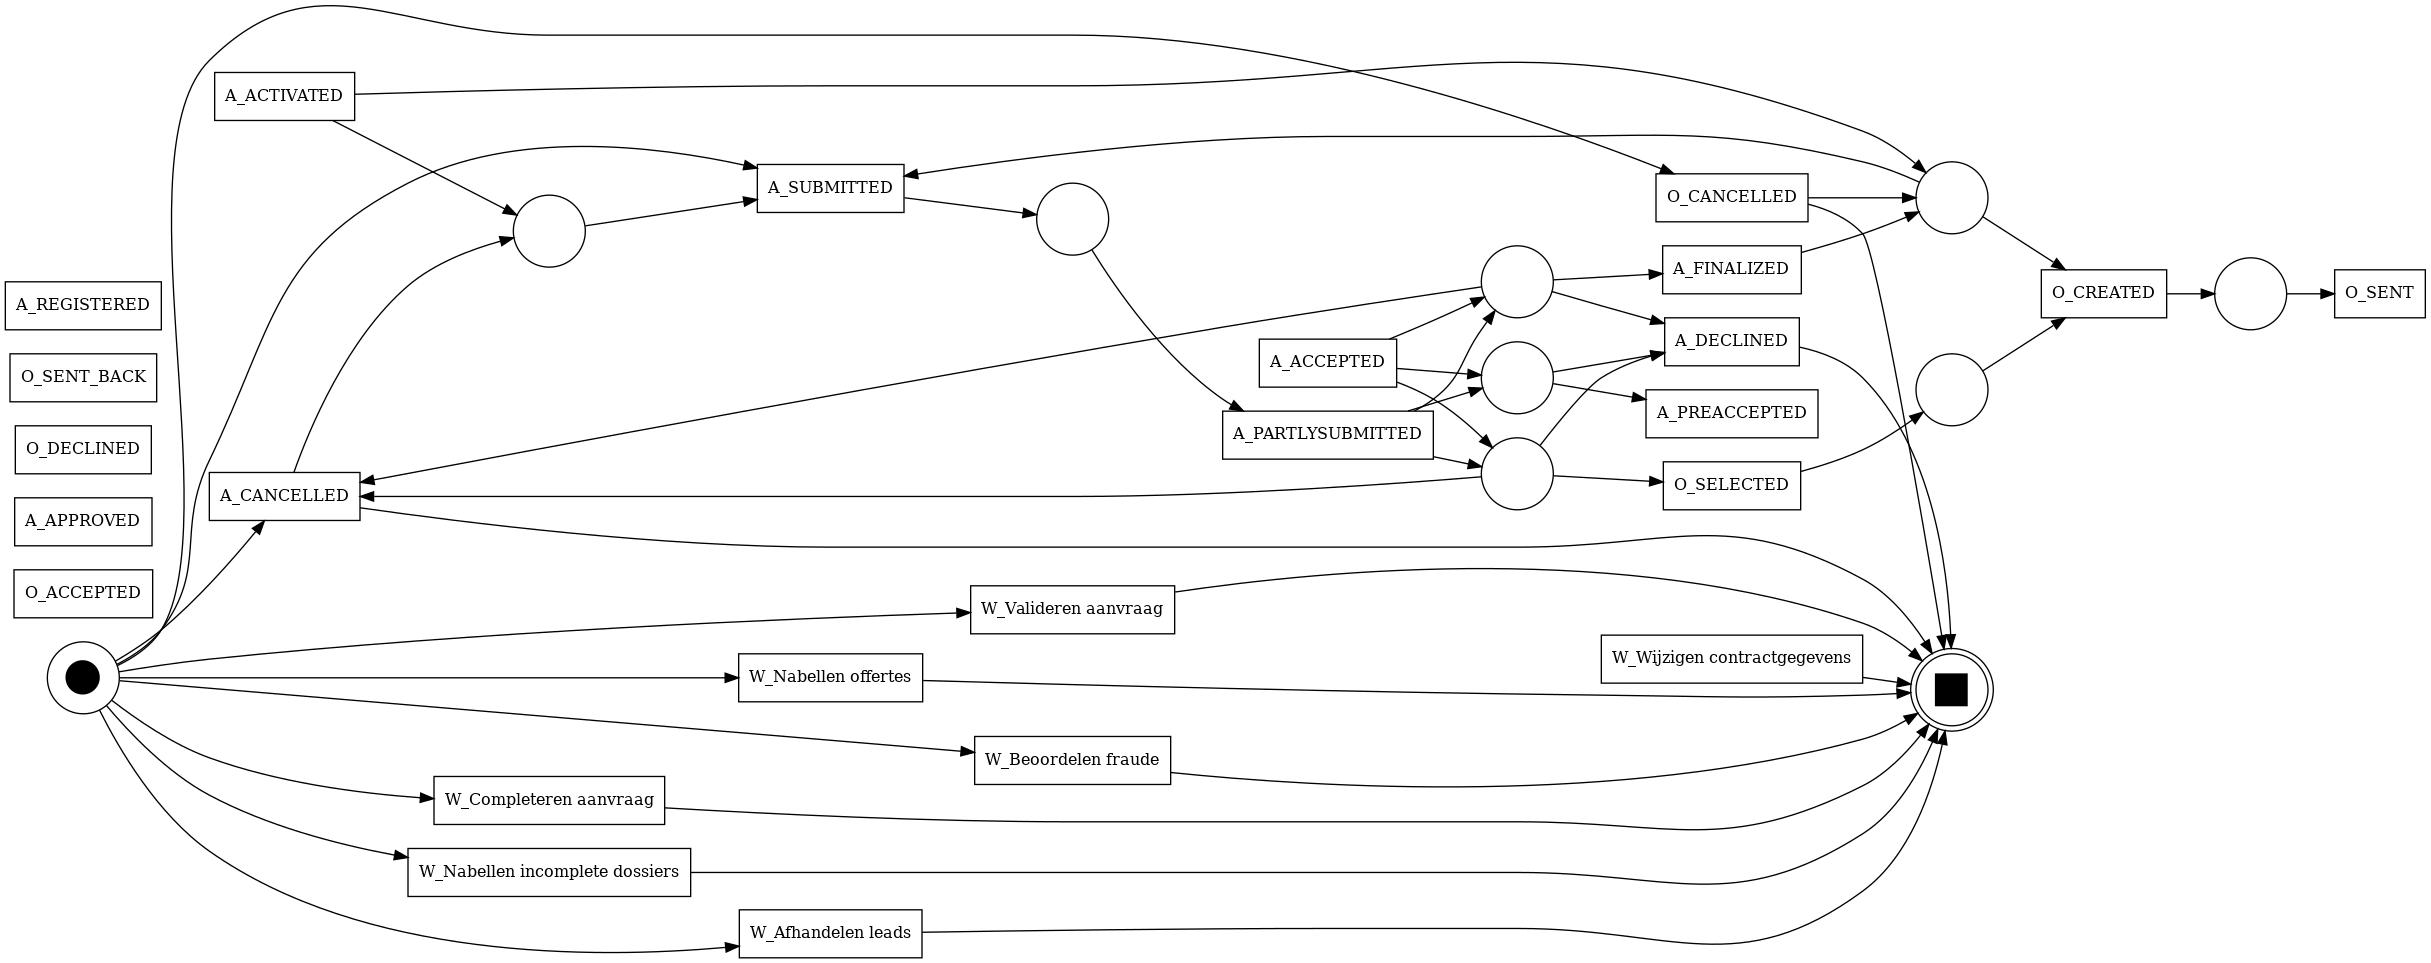

In [19]:
# alpha miner
net, initial_marking, final_marking = alpha_miner.apply(log)

# viz
gviz = pn_visualizer.apply(net, initial_marking, final_marking)
pn_visualizer.view(gviz)